In [33]:
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [35]:
print(f'shape x_train : {x_train.shape}')
print(f'shape y_train : {y_train.shape}')
print(f'shape x_test  : {x_test.shape}')
print(f'shape y_test  : {y_test.shape}')

shape x_train : (60000, 28, 28)
shape y_train : (60000,)
shape x_test  : (10000, 28, 28)
shape y_test  : (10000,)


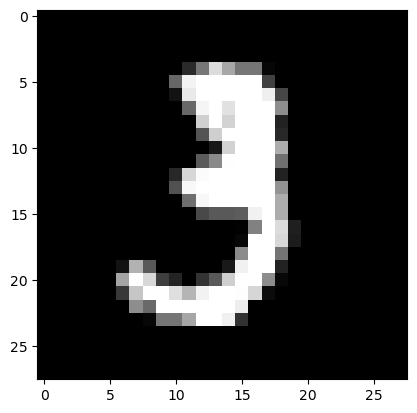

In [36]:
# visualise some of images

plt.imshow(x_train[10],cmap='gray')
plt.show()

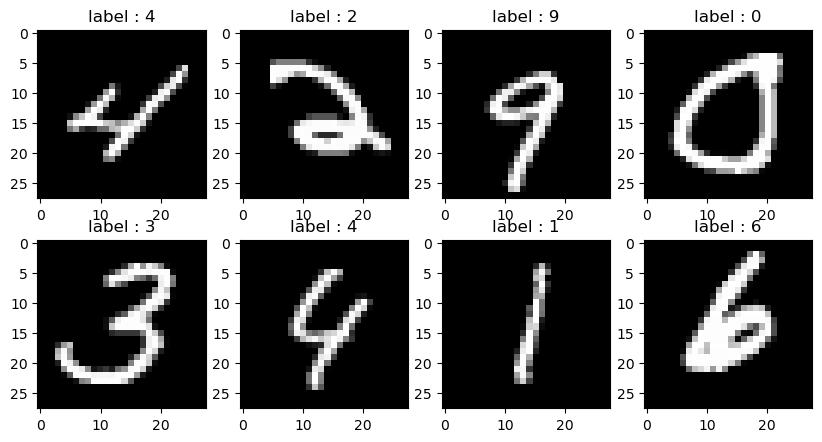

In [37]:
import random

random = random.sample(range(len(x_train)),8)

fig, axes = plt.subplots(2, 4, figsize=(10,5))
for i, index in enumerate(random):
    ax = axes[i//4, i%4]
    ax.imshow(x_train[index],cmap = 'gray')
    ax.set_title(f'label : {y_train[index]}')
plt.show()

In [38]:
x_train[0].shape

(28, 28)

In [39]:
# reshaping the data

num_row = 28
num_col = 28

x_train = x_train.reshape(x_train.shape[0], num_row*num_col)
x_test = x_test.reshape(x_test.shape[0], num_row*num_col)

# scaling

x_train  = x_train.astype('float32')/255
x_test  = x_test.astype('float32')/255

In [40]:
x_train.shape

(60000, 784)

In [41]:
np.max(x_train[0]),np.min(x_train[0])

(1.0, 0.0)

# Create a simple Neural Network Model which has

Input Layer
3 Hidden Layers - 64,32,16 neurons & uses relu activation
Output Layer ->

model.compile - Use adam optimiser, loss as per , accuracy as a metric

In [42]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
import keras

In [43]:
model = Sequential()

In [44]:
model.add(Dense(64, activation='relu',input_dim= 784))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\sonip\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,018 (207.10 KB)

 Trainable params: 53,018 (207.10 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
y_train.dtype

dtype('uint8')

In [46]:
from keras.utils import to_categorical

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [47]:
# Train model
model.fit(x_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8551 - loss: 0.4838 - val_accuracy: 0.9592 - val_loss: 0.1354
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9618 - loss: 0.1308 - val_accuracy: 0.9626 - val_loss: 0.1220
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9722 - loss: 0.0940 - val_accuracy: 0.9655 - val_loss: 0.1211
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9758 - loss: 0.0809 - val_accuracy: 0.9724 - val_loss: 0.1070
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9815 - loss: 0.0573 - val_accuracy: 0.9618 - val_loss: 0.1297
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9835 - loss: 0.0529 - val_accuracy: 0.9724 - val_loss: 0.1041
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9847 - loss: 0.0475 - val_accuracy: 0.9694 - val_loss: 0.1141
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9866 - loss: 0

In [48]:
y_train.shape

(60000, 10)

In [49]:
y_test.shape

(10000, 10)

In [50]:
model1 = Sequential()

model1.add(Dense(128, activation='relu', input_dim = 784))
model1.add(Dropout(0.2))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))          
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.2))         
model1.add(Dense(10, activation='relu'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# Train model
model.fit(x_train, y_train,
          batch_size=10,
          epochs=20,
          validation_data=(x_test, y_test))

Epoch 1/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9942 - loss: 0.0182 - val_accuracy: 0.9762 - val_loss: 0.1452
Epoch 2/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9945 - loss: 0.0163 - val_accuracy: 0.9748 - val_loss: 0.1442
Epoch 3/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9953 - loss: 0.0146 - val_accuracy: 0.9740 - val_loss: 0.1779
Epoch 4/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9956 - loss: 0.0147 - val_accuracy: 0.9763 - val_loss: 0.1452
Epoch 5/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9954 - loss: 0.0133 - val_accuracy: 0.9711 - val_loss: 0.1994
Epoch 6/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9959 - loss: 0.0139 - val_accuracy: 0.9732 - val_loss: 0.2023
Epoch 7/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9953 - loss: 0.0147 - val_accuracy: 0.9764 - val_loss: 0.1545
Epoch 8/20
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9959 - loss: 0

## Implement This Using CNN

In [51]:
# We don't need to reshape our data
# CNNs are optimised for image input

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [53]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, -1)  ## both are same


In [54]:
x_train.shape

(60000, 28, 28, 1)

In [55]:
x_test.shape

(10000, 28, 28, 1)

In [56]:
from keras.utils import to_categorical

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [57]:
from keras import layers
from keras import models

model = models.Sequential(
    [
        #CNN
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),


        #bridge between CNNS and FC layers
        layers.Flatten(),

        # FC layers
        layers.Dense(16, activation="relu"),
        layers.Dense(10, activation="softmax")


    ]
)




C:\Users\sonip\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │        25,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,602 (174.23 KB)

 Trainable params: 44,602 (174.23 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
model.fit(x_train, y_train, batch_size=128, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.7883 - loss: 0.6878 - val_accuracy: 0.9723 - val_loss: 0.0871
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9730 - loss: 0.0907 - val_accuracy: 0.9814 - val_loss: 0.0584
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9806 - loss: 0.0642 - val_accuracy: 0.9836 - val_loss: 0.0518
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9843 - loss: 0.0497 - val_accuracy: 0.9878 - val_loss: 0.0387
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9865 - loss: 0.0409 - val_accuracy: 0.9859 - val_loss: 0.0405


In [61]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.040504973381757736
Test accuracy: 0.9858999848365784


In [62]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
predictions.shape

(10000, 10)

In [64]:
y_test.shape

(10000, 10)

In [73]:
np.argmax(predictions[20])

9

In [74]:
np.argmax(y_test[20])

9

In [66]:
for idx,i in enumerate(predictions[0]):
    if i == predictions[0].max():
        print(idx)


7


In [76]:
# predictions = model.predict(X_test)  # Correct method for predictions
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class indices
print(f'Predicted class for the first test image: {predicted_classes[1]}')

Predicted class for the first test image: 2
